In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os

In [30]:
# Data folder
data_path = "C:/Users/Bcom_/Documents/Projekty/Rozpoznawanie_dzwiekow_gitarowych/data/Guitar Dataset"

#### 1- The first character denotes the type of string used in the recording:
- An 's' denotes a steel string.
- An 'n' denotes a nylon string.  
#### 2- The second character denotes the apparatus used to pluck the string:
- A 'p' denotes that the string was plucked with a pick (or plectrum).
- An 'f' denotes that the string was plucked with a finger or thumb.
- An 'n' denotes that the string was plucked with a nail.
#### 3- The third character denotes how the note was sounded:  
- An 'n' denotes the note was sounded normally and allowed to ring out.
- An 'l' denotes that the note was played louder than normal.
- An 'm' denotes that the note was muted early with the palm (usually one second after playing).

In [37]:
num_files = []
column_names = ["number_of_files", "path"]
notes_dataframe = pd.DataFrame(columns=column_names)

for root, dirs, files in os.walk(data_path):
    if root != data_path:
        notes_dataframe.loc[os.path.basename(root)] = [len(files), root]
        
notes_dataframe  



number_of_files                                               path
A2                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
A3                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
A4                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Asharp2               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Asharp3               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Asharp4               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
B2                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
B3                    48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
B4                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
C3                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
C4                    48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
C5                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Csharp3               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Csharp4               48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Csharp5               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
D2                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
D3                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
D4                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
D5                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Dsharp2               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Dsharp3               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Dsharp4               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Dsharp5               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
E2                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
E3                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
E4                    48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
E5                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
F2                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
F3                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
F4                    48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
F5                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Fsharp2               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Fsharp3               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Fsharp4               42  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Fsharp5               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
G2                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
G3                    48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
G4                    36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
G5                    24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Gsharp2               36  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Gsharp3               48  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Gsharp4               42  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...
Gsharp5               24  C:/Users/Bcom_/Documents/Projekty/Rozpoznawani...

### Wydzielenie cech

In [36]:
from pathlib import Path

data = []
feature_map = {
    's': 'steel',
    'n': 'nylon',
    'p': 'pick',
    'f': 'finger',
    'n': 'nail',
    'n': 'normal',
    'l': 'loud',
    'm': 'muted'
}


for file in Path(data_path).rglob("*.wav"):
    file_name = file.stem
    
    file_name_parts = file_name.split("-")
    clazz = file_name_parts[0] 
    feature_code = file_name_parts[2]
    
    if len(feature_code) == 3:
        string = feature_map.get(feature_code[0], 'unknown')
        pluck = feature_map.get(feature_code[1], 'unknown')
        sound = feature_map.get(feature_code[2], 'unknown')

        try:
            y, sr = librosa.load(file, sr=None) 
        except Exception as e:
            print(f"File loading error: {file}: {e}")
            continue
        data.append([file_name, y, sr, string, pluck, sound, clazz])

df = pd.DataFrame(data, columns=["file_name", "audio_file", "sampling_rate", "string_type", "pluck_type", "sound_type", "clazz"])
df = pd.get_dummies(df, columns=["string_type", "pluck_type", "sound_type"])

df.head()


file_name                                         audio_file  \
0   A2-1-spn  [0.00018310547, 0.00018310547, 9.1552734e-05, ...   
1  A2-10-sfn  [0.00018310547, 0.00039672852, 0.00024414062, ...   
2  A2-11-sfm  [0.0, 0.00015258789, 0.00024414062, 0.00018310...   
3  A2-12-snn  [-0.0002746582, -0.0002746582, -0.0002746582, ...   
4  A2-13-npn  [0.00024414062, 6.1035156e-05, 9.1552734e-05, ...   

   sampling_rate clazz  string_type_normal  string_type_steel  \
0          44100    A2               False               True   
1          44100    A2               False               True   
2          44100    A2               False               True   
3          44100    A2               False               True   
4          44100    A2                True              False   

   pluck_type_finger  pluck_type_normal  pluck_type_pick  sound_type_loud  \
0              False              False             True            False   
1               True              False            False            False   
2               True              False            False            False   
3              False               True            False            False   
4              False              False             True            False   

   sound_type_muted  sound_type_normal  
0             False               True  
1             False               True  
2              True              False  
3             False               True  
4             False               True

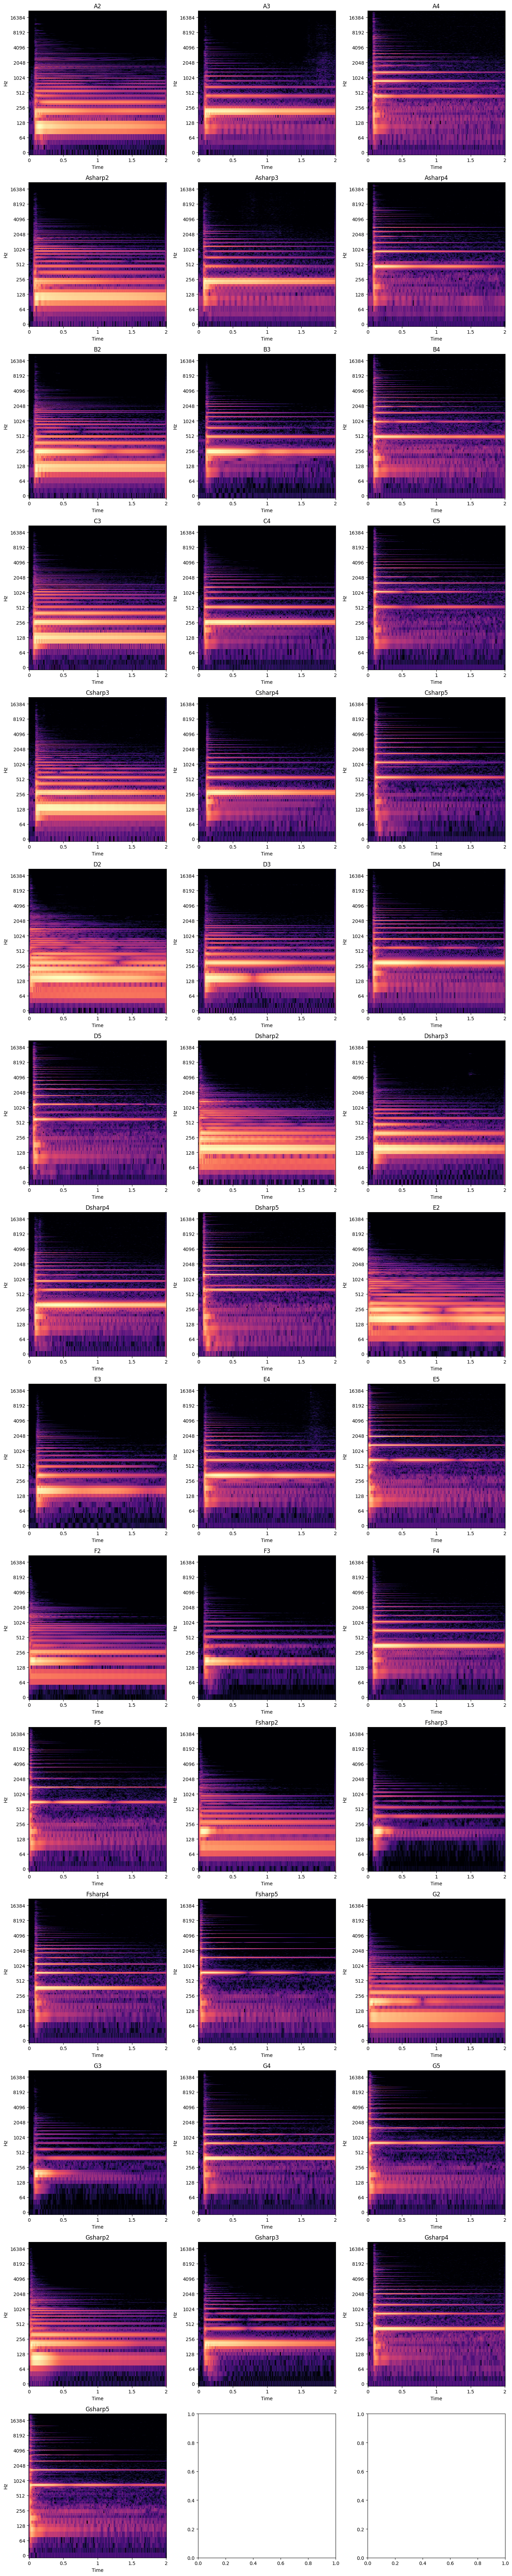

In [51]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import math

examp = df[
    df["pluck_type_finger"] & df["string_type_steel"] & df["sound_type_normal"]
].groupby("clazz").first().reset_index()

num_of_figure_cols = 3
num_rows = math.ceil(len(examp) / num_of_figure_cols)
fig, axes = plt.subplots(num_rows, num_of_figure_cols, figsize=(15, 5 * num_rows))
axes = np.array(axes).flatten()

for ax, (_, row) in zip(axes, examp.iterrows()):
    y = row["audio_file"]
    sr = row["sampling_rate"]
    clazz = row["clazz"]

    y_stft = librosa.stft(y)
    y_db = librosa.amplitude_to_db(abs(y_stft), ref=np.max)
    librosa.display.specshow(y_db, sr=sr, x_axis="time", y_axis="log", ax=ax)
    ax.set_title(clazz)

plt.tight_layout()
plt.show()



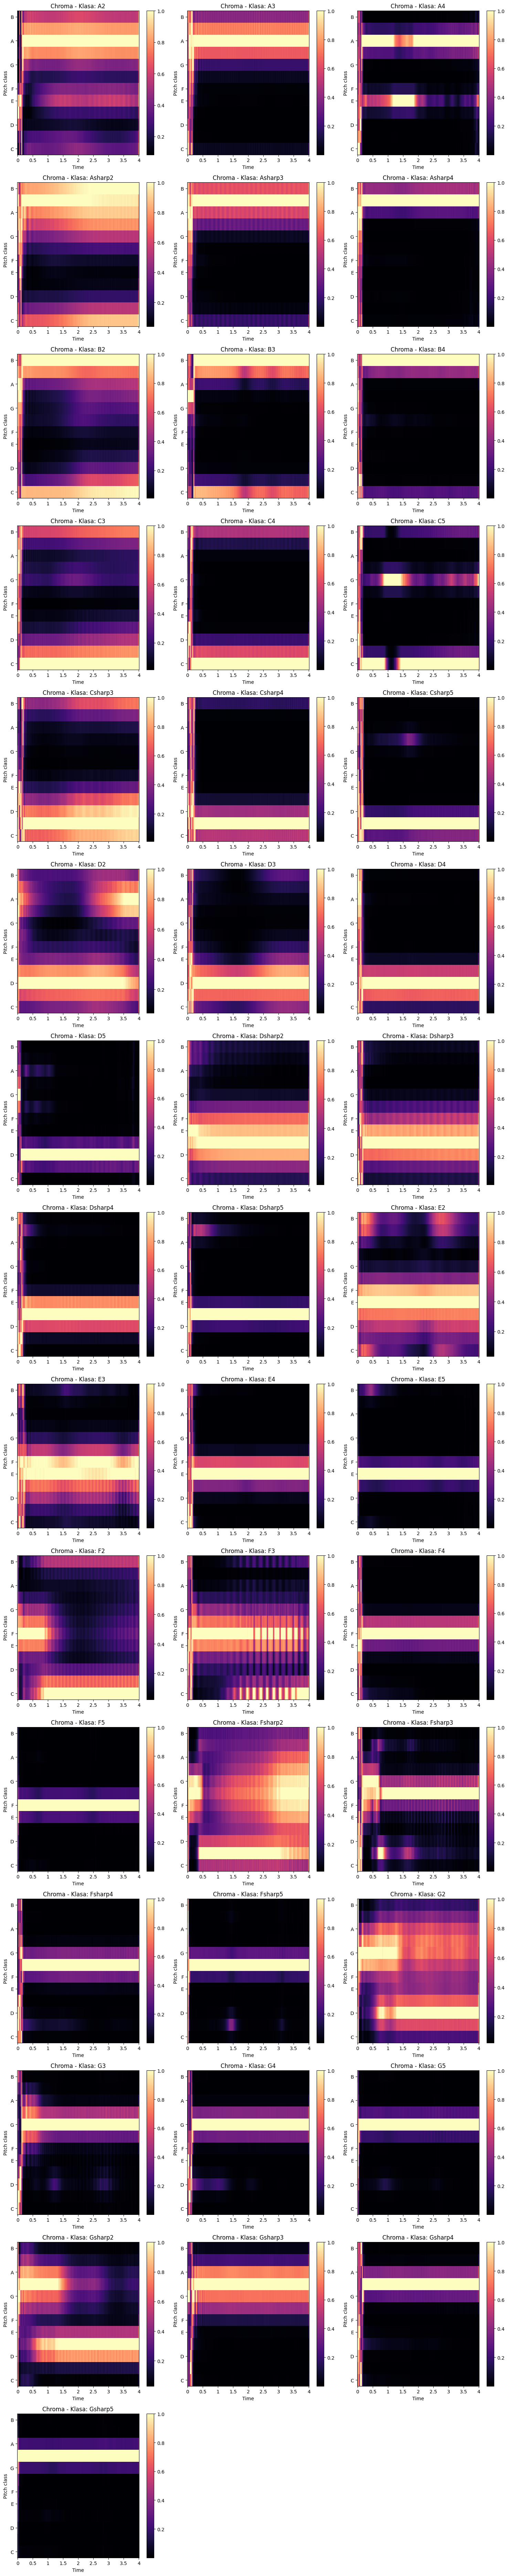

In [53]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import math

# Wybieranie po jednym wierszu dla każdej klasy z określonymi cechami
examp = df[
    df["pluck_type_finger"] & df["string_type_steel"] & df["sound_type_normal"]
].groupby("clazz").first().reset_index()

# Liczba kolumn i wierszy w układzie subplotów
num_of_figure_cols = 3
num_rows = math.ceil(len(examp) / num_of_figure_cols)

# Tworzenie figure i subplotów
fig, axes = plt.subplots(num_rows, num_of_figure_cols, figsize=(15, 5 * num_rows))
axes = np.array(axes).flatten()  # Spłaszczamy, żeby łatwiej iterować

# Iteracja po każdej klasie i rysowanie wykresów chroma
for ax, (_, row) in zip(axes, examp.iterrows()):
    try:
        y = row["audio_file"]
        sr = row["sampling_rate"]
        clazz = row["clazz"]

        # Obliczanie chromagramu
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)

        # Rysowanie wykresu chroma w danym subplot
        im = librosa.display.specshow(chroma, y_axis="chroma", x_axis="time", ax=ax)
        fig.colorbar(im, ax=ax)  # Dodanie paska kolorów do subplotu
        ax.set_title(f"Chroma - Klasa: {clazz}")

    except Exception as e:
        print(f"Błąd dla klasy {clazz}: {e}")
        ax.set_title(f"Błąd: {clazz}")

# Usunięcie pustych wykresów, jeśli liczba klas nie jest wielokrotnością 3
for i in range(len(examp), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Data Augmentation (Do zrobienia)